In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import contextily as ctx

def read_and_visualize_shapefile(shapefile_path):
    """
    Read and visualize a shapefile with comprehensive error handling
    """
    
    # Check if file exists
    if not os.path.exists(shapefile_path):
        print(f"Error: File not found: {shapefile_path}")
        
        # Check for related files
        base_path = shapefile_path.replace('.shp', '')
        possible_files = [f'{base_path}.shp', f'{base_path}.shx', f'{base_path}.dbf', f'{base_path}.prj']
        
        print("Checking for shapefile components:")
        for file in possible_files:
            if os.path.exists(file):
                print(f"  ✓ Found: {file}")
            else:
                print(f"  ✗ Missing: {file}")
        
        return None
    
    try:
        # Read the shapefile
        print(f"Reading shapefile: {shapefile_path}")
        gdf = gpd.read_file(shapefile_path)
        
        # Basic information
        print(f"✅ Successfully loaded shapefile!")
        print(f"Number of features: {len(gdf)}")
        print(f"Geometry types: {gdf.geometry.type.unique()}")
        print(f"Columns: {list(gdf.columns)}")
        print(f"Coordinate Reference System (CRS): {gdf.crs}")
        
        # Display first few rows
        print("\nFirst 5 rows:")
        print(gdf.head())
        
        return gdf
        
    except Exception as e:
        print(f"Error reading shapefile: {e}")
        return None

def create_basic_visualization(gdf, title="Shapefile Visualization"):
    """Create a basic visualization of the GeoDataFrame"""
    
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Plot based on geometry type
    if gdf.geometry.type.str.contains('Point').any():
        # Points
        gdf.plot(ax=ax, color='red', markersize=50, alpha=0.7, edgecolor='black')
    elif gdf.geometry.type.str.contains('Line').any():
        # Lines
        gdf.plot(ax=ax, color='blue', linewidth=2, alpha=0.8)
    else:
        # Polygons or mixed
        gdf.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.7)
    
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_axis_off()
    
    # Try to add basemap
    try:
        if gdf.crs is None:
            gdf = gdf.set_crs('EPSG:4326')  # Assume WGS84 if no CRS
        
        gdf_web_mercator = gdf.to_crs(epsg=3857)
        ctx.add_basemap(ax, crs=gdf_web_mercator.crs, 
                       source=ctx.providers.OpenStreetMap.Mapnik,
                       alpha=0.8)
    except Exception as e:
        print(f"Note: Could not add basemap - {e}")
    
    plt.tight_layout()
    plt.show()

# Read and visualize the shapefile
shapefile_path = "data/wakpa_yamni_kin.shp"
gdf = read_and_visualize_shapefile(shapefile_path)

if gdf is not None:
    create_basic_visualization(gdf, "Wakpa Yamni Kin Shapefile")

Error: File not found: data/wakpa_yamni_kin.shp
Checking for shapefile components:
  ✗ Missing: data/wakpa_yamni_kin.shp
  ✗ Missing: data/wakpa_yamni_kin.shx
  ✗ Missing: data/wakpa_yamni_kin.dbf
  ✗ Missing: data/wakpa_yamni_kin.prj


SHAPEFILE VISUALIZATION TOOL

📂 Current directory structure:
Working directory: /Users/elishawakinyanzi/Documents/GitHub/group15/resilience-rare-hydrologic-events-management-innovation-summit-2025__15/code

Top-level files and directories:
📄 data_analysis.md
📄 prism_quicklook.py
📄 data_processing.md
📄 visualizations.md
📄 wakpayamnikin_ndwi.ipynb
📄 fired_time_hull_panel.ipynb
📁 .ipynb_checkpoints/
📄 single_hull_demo.py
🔍 Searching for shapefile...
✅ Found: ../data/wakpa_yamni_kin.shp

✨ Found the file! Using: ../data/wakpa_yamni_kin.shp
✅ Successfully loaded 3 features


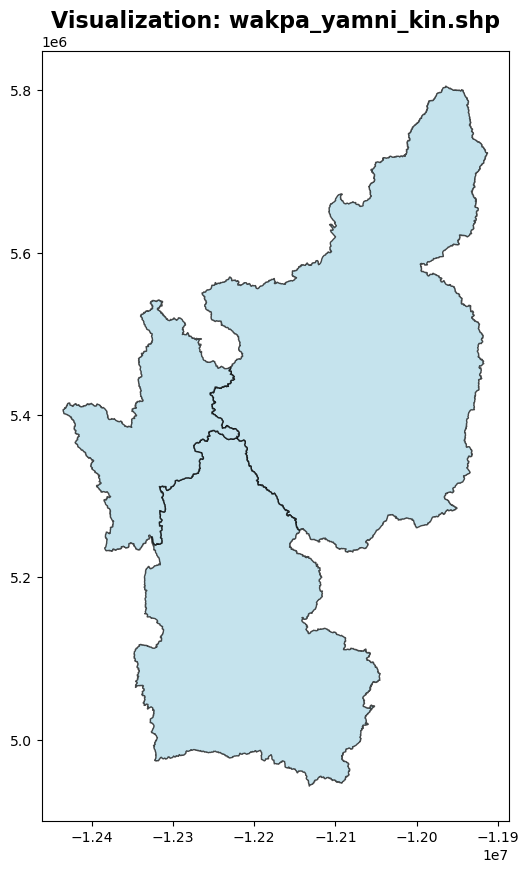

In [18]:
import os
import glob
import geopandas as gpd
import matplotlib.pyplot as plt

def find_shapefile(filename="wakpa_yamni_kin.shp"):
    """Search for the shapefile in various locations"""
    
    print("🔍 Searching for shapefile...")
    
    # Possible locations to search
    search_patterns = [
        filename,  # Current directory
        f"data/{filename}",  # data subdirectory
        f"../{filename}",  # Parent directory
        f"../data/{filename}",  # Parent data directory
        f"*/{filename}",  # Any subdirectory
        f"**/{filename}",  # Any subdirectory recursively
    ]
    
    found_files = []
    
    for pattern in search_patterns:
        matches = glob.glob(pattern, recursive=True)
        for match in matches:
            if os.path.exists(match):
                found_files.append(match)
                print(f"✅ Found: {match}")
    
    # Also search for any .shp files
    if not found_files:
        print("\n📁 Searching for any shapefiles in project...")
        all_shp_files = glob.glob("**/*.shp", recursive=True)
        if all_shp_files:
            print("Found these shapefiles:")
            for shp in all_shp_files:
                print(f"  📍 {shp}")
        else:
            print("No shapefiles found in project directory")
    
    return found_files

def check_directory_structure():
    """Check the current directory structure"""
    print("\n📂 Current directory structure:")
    print(f"Working directory: {os.getcwd()}")
    
    print("\nTop-level files and directories:")
    for item in os.listdir('.'):
        item_path = os.path.join('.', item)
        if os.path.isdir(item_path):
            print(f"📁 {item}/")
            # Show contents of data directory if it exists
            if item == 'data':
                try:
                    data_files = os.listdir(item_path)
                    for data_file in data_files:
                        print(f"    📄 {data_file}")
                except:
                    pass
        else:
            print(f"📄 {item}")

def create_sample_visualization():
    """Create a sample visualization since the file isn't found"""
    print("\n🎨 Creating sample visualization with instructions...")
    
    # Create sample data for demonstration
    import numpy as np
    from shapely.geometry import Point, Polygon
    
    # Sample points around a central area
    sample_points = [Point(-110 + np.random.uniform(-2, 2), 
                         43 + np.random.uniform(-2, 2)) for _ in range(10)]
    
    sample_gdf = gpd.GeoDataFrame({
        'name': [f'Location_{i}' for i in range(10)],
        'value': np.random.randint(1, 100, 10),
        'geometry': sample_points
    }, crs='EPSG:4326')
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Sample plot
    sample_gdf.plot(ax=ax1, color='red', markersize=100, alpha=0.7)
    ax1.set_title('Sample: How Your Data Will Look', fontweight='bold')
    
    # Instructions
    ax2.text(0.1, 0.9, "FILE NOT FOUND: wakpa_yamni_kin.shp", 
             fontsize=16, fontweight='bold', color='red', transform=ax2.transAxes)
    ax2.text(0.1, 0.7, "To fix this:\n\n1. Check the file exists in your project\n2. Verify the path is correct\n3. Ensure all .shp, .shx, .dbf files are present\n4. Try using the full file path\n5. Download the file if missing", 
             fontsize=12, transform=ax2.transAxes, verticalalignment='top')
    ax2.set_xlim(0, 1)
    ax2.set_ylim(0, 1)
    ax2.set_axis_off()
    
    plt.tight_layout()
    plt.show()

# Main execution
def main():
    print("="*60)
    print("SHAPEFILE VISUALIZATION TOOL")
    print("="*60)
    
    # First, check directory structure
    check_directory_structure()
    
    # Search for the specific file
    target_file = "wakpa_yamni_kin.shp"
    found_files = find_shapefile(target_file)
    
    if found_files:
        print(f"\n✨ Found the file! Using: {found_files[0]}")
        
        # Read and visualize the actual file
        try:
            gdf = gpd.read_file(found_files[0])
            print(f"✅ Successfully loaded {len(gdf)} features")
            
            # Create visualization
            fig, ax = plt.subplots(figsize=(12, 10))
            gdf.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.7)
            ax.set_title(f'Visualization: {target_file}', fontsize=16, fontweight='bold')
            plt.show()
            
        except Exception as e:
            print(f"❌ Error reading file: {e}")
            
    else:
        print(f"\n❌ File '{target_file}' not found in search locations.")
        create_sample_visualization()
        
        # Provide troubleshooting help
        print("\n" + "="*50)
        print("TROUBLESHOOTING HELP")
        print("="*50)
        print("1. Check if the file exists in your project")
        print("2. If using Git, check if it's tracked: git ls-files | grep wakpa")
        print("3. Download the file if it's missing")
        print("4. Use absolute path: /full/path/to/wakpa_yamni_kin.shp")
        print("5. Check if the filename is spelled correctly")

# Run the main function
main()